In [1]:
import sqlite3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv('../data/sample_data.csv')  # adjust path as needed

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Quick check
print(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              60 non-null     datetime64[ns]
 1   calories          60 non-null     int64         
 2   protein           60 non-null     int64         
 3   carbs             60 non-null     int64         
 4   fat               60 non-null     int64         
 5   activity_minutes  60 non-null     int64         
 6   steps             60 non-null     int64         
 7   sleep_hours       60 non-null     float64       
 8   weight            60 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 4.3 KB
None


,date,calories,protein,carbs,fat,activity_minutes,steps,sleep_hours,weight
0,2025-04-13,2328,126,240,81,53,10617,7.6,70.2
1,2025-04-14,2533,80,245,70,15,7764,8.8,70.2
2,2025-04-15,1945,119,270,65,24,5777,5.2,70.3
3,2025-04-16,2154,130,236,70,44,9298,6.3,70.3
4,2025-04-17,1639,106,188,68,19,7342,4.3,69.9


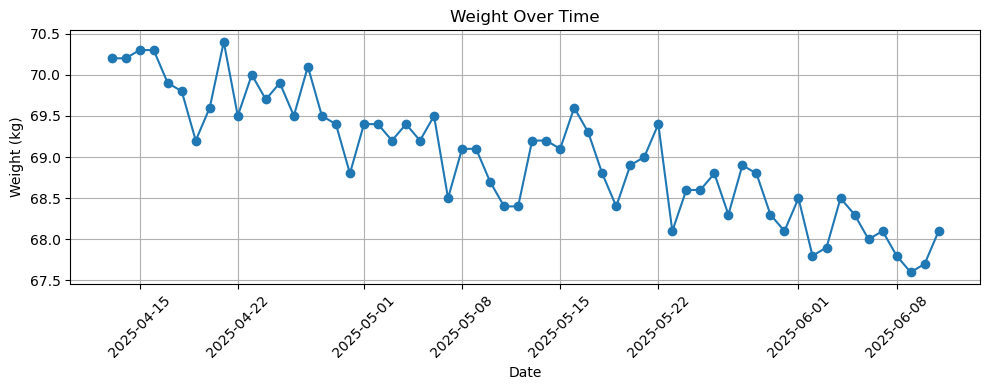

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['weight'], marker='o')
plt.title('Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


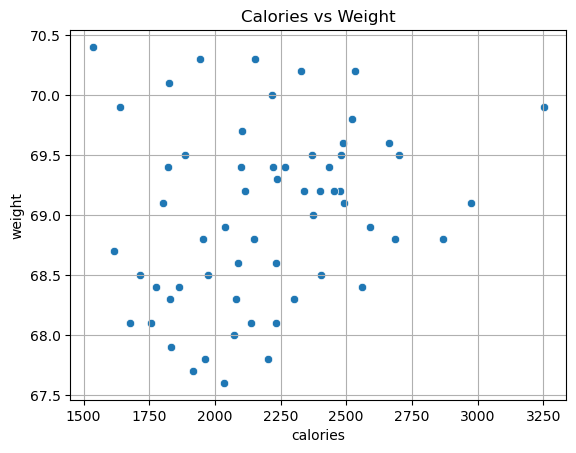

In [4]:
sns.scatterplot(data=df, x='calories', y='weight')
plt.title('Calories vs Weight')
plt.grid(True)
plt.show()


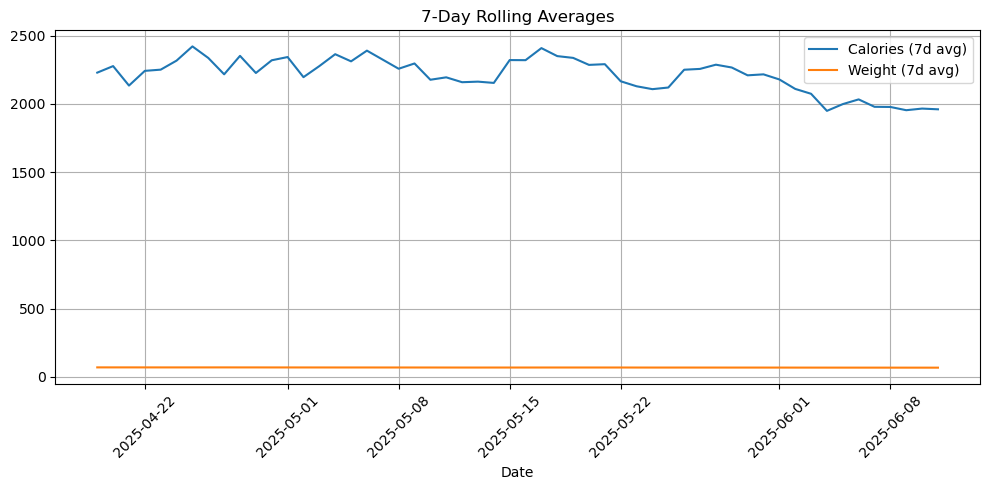

In [5]:
df['calories_roll'] = df['calories'].rolling(7).mean()
df['weight_roll'] = df['weight'].rolling(7).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['calories_roll'], label='Calories (7d avg)')
plt.plot(df['date'], df['weight_roll'], label='Weight (7d avg)')
plt.legend()
plt.title('7-Day Rolling Averages')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


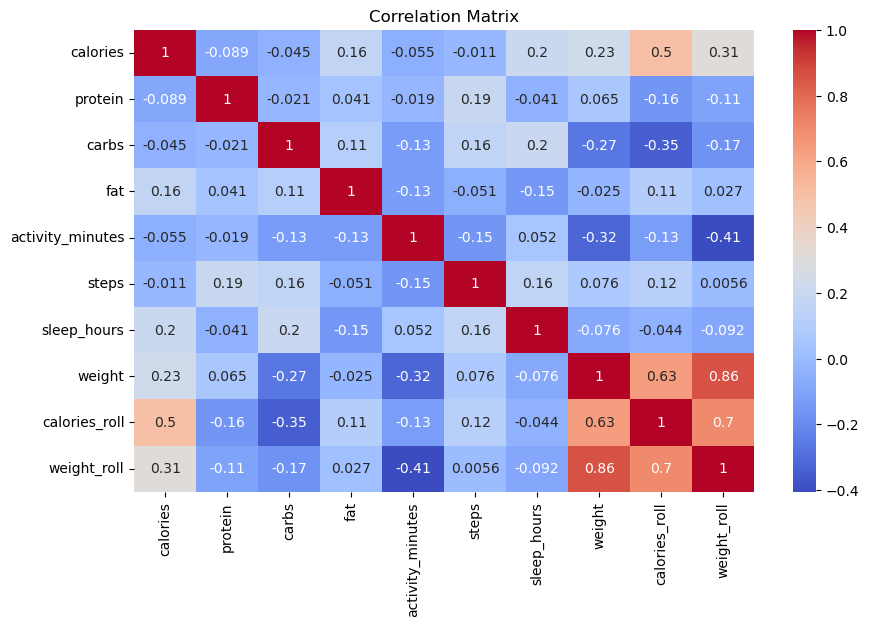

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='date').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


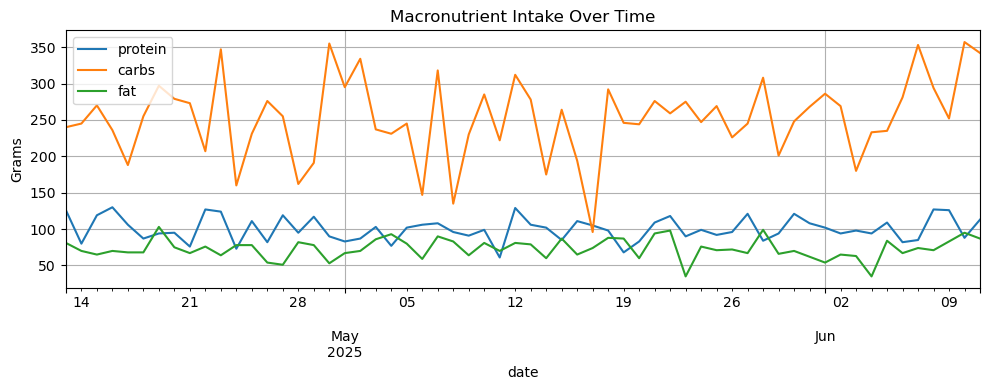

In [7]:
df.set_index('date')[['protein', 'carbs', 'fat']].plot(figsize=(10, 4))
plt.title('Macronutrient Intake Over Time')
plt.ylabel('Grams')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df[['sleep_hours', 'activity_minutes', 'weight']].corr()


,sleep_hours,activity_minutes,weight
sleep_hours,1.000000,0.052392,-0.076376
activity_minutes,0.052392,1.000000,-0.317898
weight,-0.076376,-0.317898,1.000000


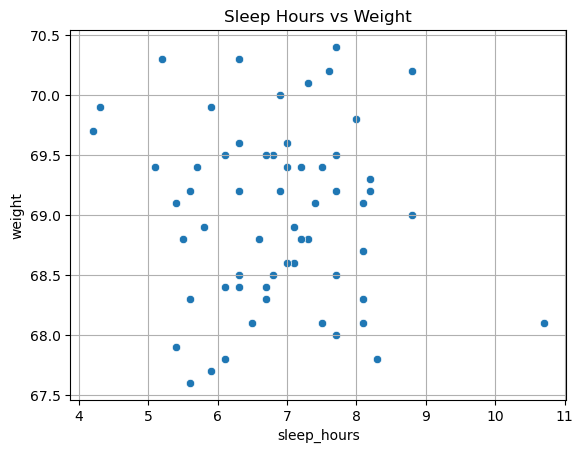

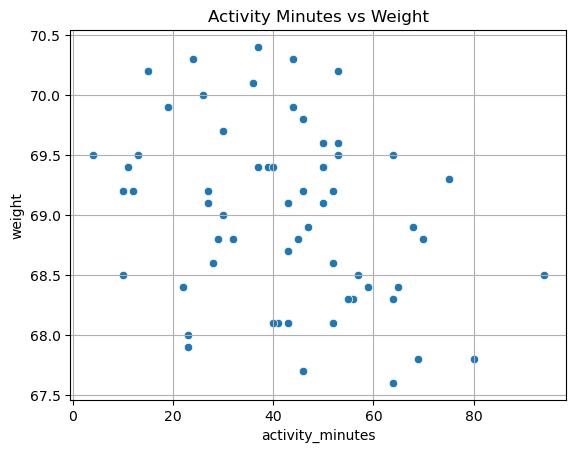

In [9]:
# Sleep vs Weight
sns.scatterplot(data=df, x='sleep_hours', y='weight')
plt.title('Sleep Hours vs Weight')
plt.grid(True)
plt.show()

# Activity vs Weight
sns.scatterplot(data=df, x='activity_minutes', y='weight')
plt.title('Activity Minutes vs Weight')
plt.grid(True)
plt.show()


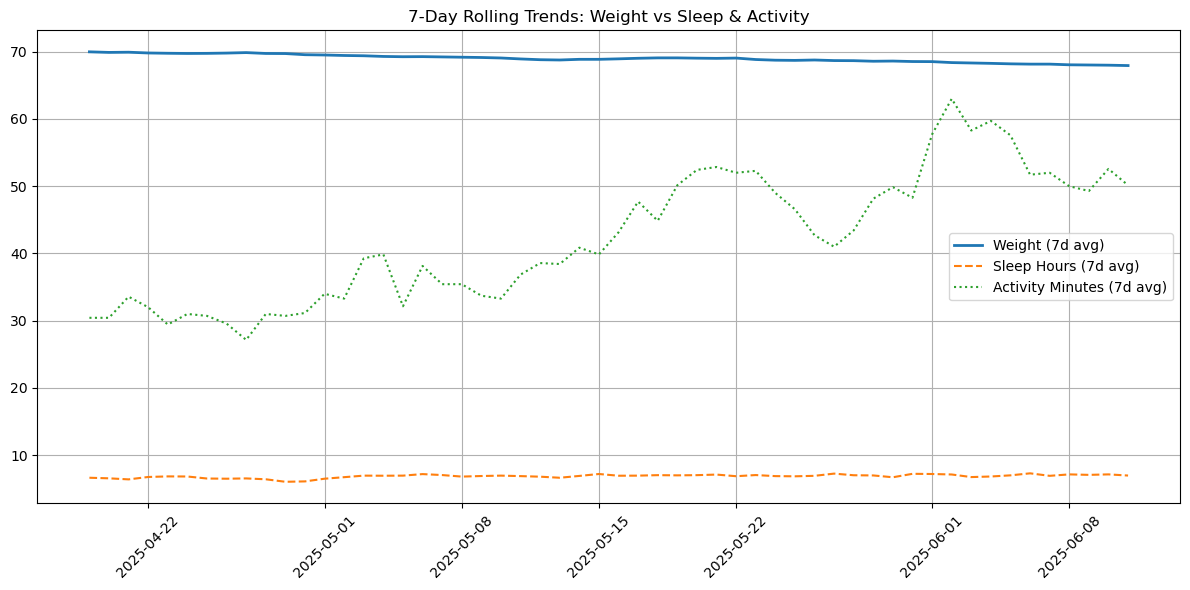

In [10]:
df['sleep_roll'] = df['sleep_hours'].rolling(7).mean()
df['activity_roll'] = df['activity_minutes'].rolling(7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['weight_roll'], label='Weight (7d avg)', linewidth=2)
plt.plot(df['date'], df['sleep_roll'], label='Sleep Hours (7d avg)', linestyle='--')
plt.plot(df['date'], df['activity_roll'], label='Activity Minutes (7d avg)', linestyle=':')
plt.title('7-Day Rolling Trends: Weight vs Sleep & Activity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


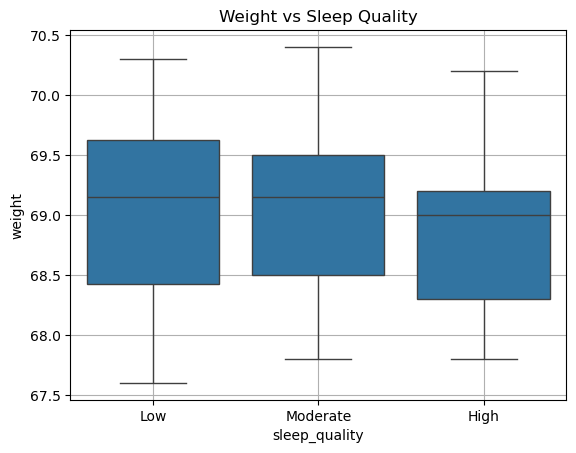

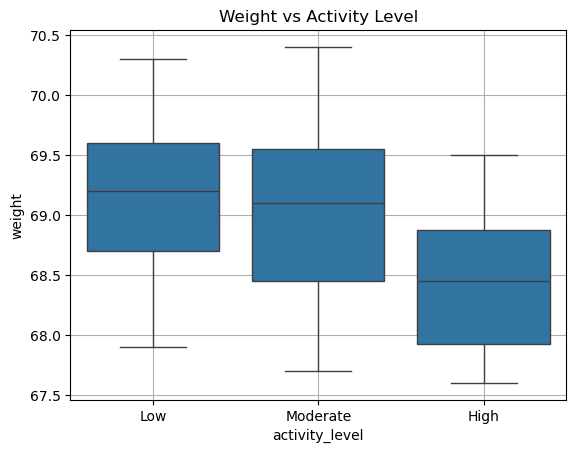

In [11]:
df['sleep_quality'] = pd.cut(df['sleep_hours'], bins=[0, 6, 8, 10], labels=['Low', 'Moderate', 'High'])
df['activity_level'] = pd.cut(df['activity_minutes'], bins=[0, 30, 60, 120], labels=['Low', 'Moderate', 'High'])

# Boxplot: Weight by Sleep Quality
sns.boxplot(data=df, x='sleep_quality', y='weight')
plt.title('Weight vs Sleep Quality')
plt.grid(True)
plt.show()

# Boxplot: Weight by Activity Level
sns.boxplot(data=df, x='activity_level', y='weight')
plt.title('Weight vs Activity Level')
plt.grid(True)
plt.show()
